In [74]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

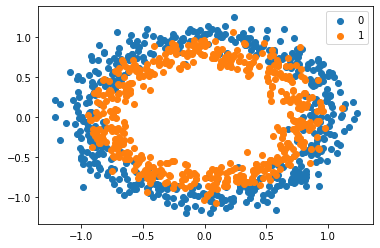

In [75]:
# generate the dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
for i in range(2):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

In [76]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [77]:
# A simple NN composed of 2 dense layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(40, activation='relu', kernel_initializer='GlorotUniform'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [78]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
# Training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

Train: 0.836, Test: 0.730


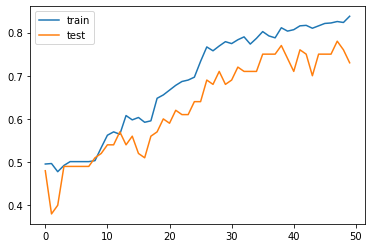

In [80]:
# evaluating the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [81]:
# Same architecture with a batch normalization layer
bn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(40, activation='relu', kernel_initializer='GlorotUniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [82]:
# Compiling the model
bn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
# Training the model
bn_history = bn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

Train: 0.852, Test: 0.810


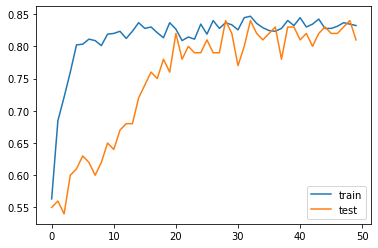

In [84]:
# evaluate the model
_, train_acc = bn_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = bn_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(bn_history.history['accuracy'], label='train')
pyplot.plot(bn_history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

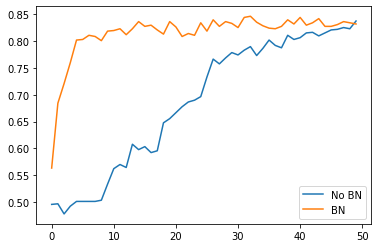

In [85]:
# comparing the two models on training data
pyplot.plot(history.history['accuracy'], label='No BN')
pyplot.plot(bn_history.history['accuracy'], label='BN')
pyplot.legend()
pyplot.show()